In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\vishw\Saved Handson python Code\loan\loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [3]:
df.shape

(39717, 111)

In [4]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
print(df.duplicated().count())

39717


****Handleing null Values****


In [9]:
df.dropna(axis = 1, how = 'all', inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


There are several columns which are single valued.


In [10]:
single_value_col = []
for column in df.columns:
    if df[column].nunique()==1:
        single_value_col.append(column)

print(single_value_col)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [11]:
df.drop(single_value_col,axis=1,inplace = True)

In [12]:
df.info(verbose = 'true', show_counts = 'true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Now we have 48 columns

We are analyzing the user details and the driving factors of loan defaulting before approving loan.
So we can safely remove the columns / variables corresponding to that scenario.
Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
"desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
"out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
"funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

In [13]:
df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [14]:
df.isnull().sum()

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

Handling pub_rec_bankruptcies cloumns null values


In [15]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [16]:
print(df.pub_rec_bankruptcies.isnull().sum())

697


In [17]:
df.pub_rec_bankruptcies.fillna('0',inplace=True)
print(df.pub_rec_bankruptcies.isnull().sum())

0


In [18]:
df=df.dropna(subset=['emp_length'])

In [19]:
df = df.dropna(subset=['revol_util'])

In [20]:
df.isnull().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

Null Valuves has been handled

In [21]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38,0.0


Standardizing the data
"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }

"revol_util" column although described as an object column, it has continous values.

So we need to standardize the data in this column
"int_rate" is one such column.

Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [22]:
df.emp_length.value_counts()

emp_length
10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: count, dtype: int64

In [23]:
mapping = {'10+ years': 10, '< 1 year': 0.5, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
           '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9}

df['emp_length'] = df['emp_length'].map(mapping)

In [24]:
df['revol_util'] = df['revol_util'].str.rstrip('%')

df['int_rate'] = df['int_rate'].str.rstrip('%')

In [25]:
df.term=df.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

In [26]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37,0.0
4,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90,38,0.0


In Loan_status Column, As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [27]:
df = df[df.loan_status!='Current']

<Axes: >

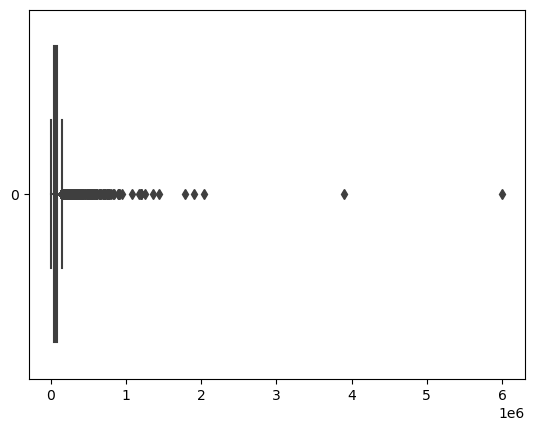

In [28]:
sns.boxplot(df['annual_inc'],orient='h')

<Axes: >

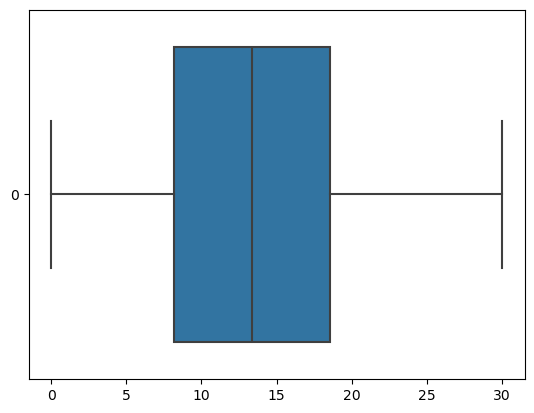

In [29]:
sns.boxplot(df['dti'],orient='h')

<Axes: >

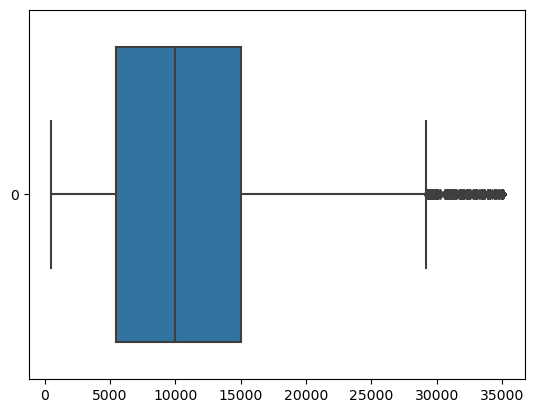

In [30]:
sns.boxplot(df['loan_amnt'],orient='h')

<Axes: >

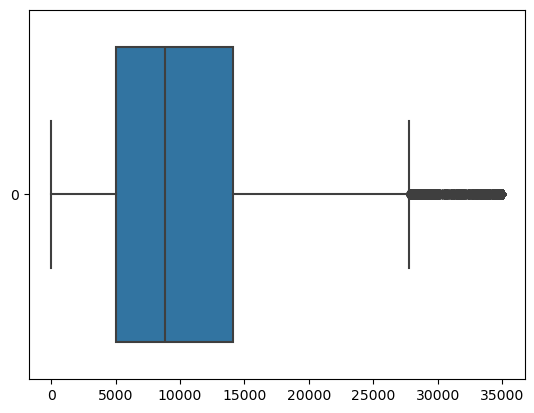

In [31]:
sns.boxplot(df['funded_amnt_inv'],orient='h')

In [32]:
print(df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99]))

0.50     60000.00
0.75     83000.00
0.90    116714.40
0.95    142000.00
0.97    166307.32
0.98    189996.00
0.99    235000.00
Name: annual_inc, dtype: float64


In [33]:
df = df[df.annual_inc <= df['annual_inc'].quantile(0.95)]

In [34]:
df.info(verbose = 'true', show_counts = 'true')

<class 'pandas.core.frame.DataFrame'>
Index: 35630 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35630 non-null  int64  
 1   funded_amnt_inv       35630 non-null  float64
 2   term                  35630 non-null  int32  
 3   int_rate              35630 non-null  object 
 4   installment           35630 non-null  float64
 5   grade                 35630 non-null  object 
 6   sub_grade             35630 non-null  object 
 7   emp_length            35630 non-null  float64
 8   home_ownership        35630 non-null  object 
 9   annual_inc            35630 non-null  float64
 10  verification_status   35630 non-null  object 
 11  issue_d               35630 non-null  object 
 12  loan_status           35630 non-null  object 
 13  purpose               35630 non-null  object 
 14  dti                   35630 non-null  float64
 15  earliest_cr_line      35

****Changing Data type to Categoriacal or numerical****

In [35]:
df.int_rate=df.int_rate.astype('float').round(2)
df.grade=df.grade.astype('category')
df.sub_grade=df.sub_grade.astype('category')
df.home_ownership=df.home_ownership.astype('category')
df.verification_status=df.verification_status.astype('category')
df.purpose=df.purpose.astype('category')
df.revol_util=df.revol_util.astype('float')
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.astype('float')
df.loan_status=df.loan_status.astype('category')

In [36]:
df.info(verbose = 'true', show_counts = 'true')

<class 'pandas.core.frame.DataFrame'>
Index: 35630 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             35630 non-null  int64   
 1   funded_amnt_inv       35630 non-null  float64 
 2   term                  35630 non-null  int32   
 3   int_rate              35630 non-null  float64 
 4   installment           35630 non-null  float64 
 5   grade                 35630 non-null  category
 6   sub_grade             35630 non-null  category
 7   emp_length            35630 non-null  float64 
 8   home_ownership        35630 non-null  category
 9   annual_inc            35630 non-null  float64 
 10  verification_status   35630 non-null  category
 11  issue_d               35630 non-null  object  
 12  loan_status           35630 non-null  category
 13  purpose               35630 non-null  category
 14  dti                   35630 non-null  float64 
 15  earlies

****Changing data type for Date type Columns****


In [37]:
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')
df.earliest_cr_line=pd.to_datetime(df.earliest_cr_line,format='%b-%y')

In [38]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,1,3,0,83.7,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,1999-04-01,5,3,0,9.4,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,2,2,0,98.5,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,1996-02-01,1,10,0,21.0,37,0.0
5,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,2004-11-01,3,9,0,28.3,12,0.0


This Data Looks clean is ready to use.

****Univariate Analysis****

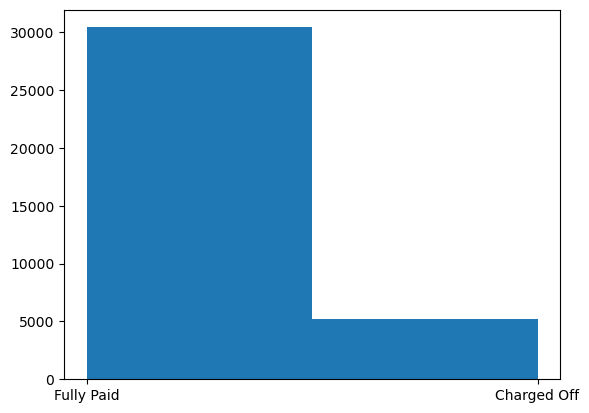

In [39]:
plt.hist(df.loan_status, bins=2, width=0.5)
plt.show()

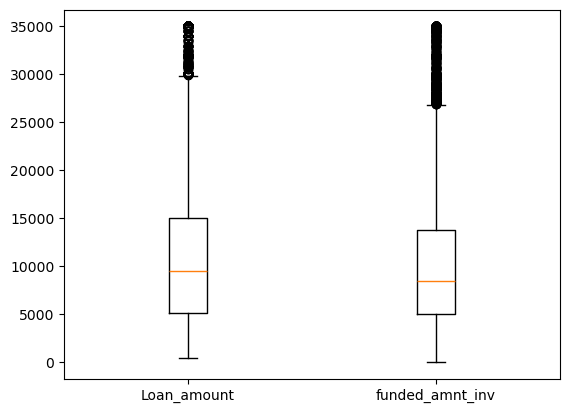

In [40]:
plt.boxplot([df.loan_amnt,df.funded_amnt_inv])
plt.xticks((1,2),["Loan_amount", "funded_amnt_inv"])
plt.show()

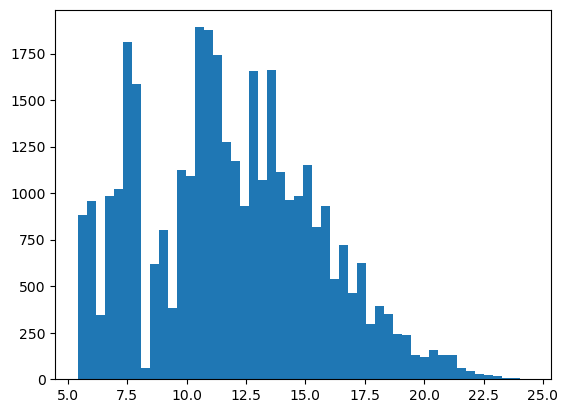

In [41]:
# Frequency Distribution of interest rate
plt.hist(df.int_rate, bins=50)
plt.show()

Interest rate is slightly right skewed, maximum occurs at around 11%

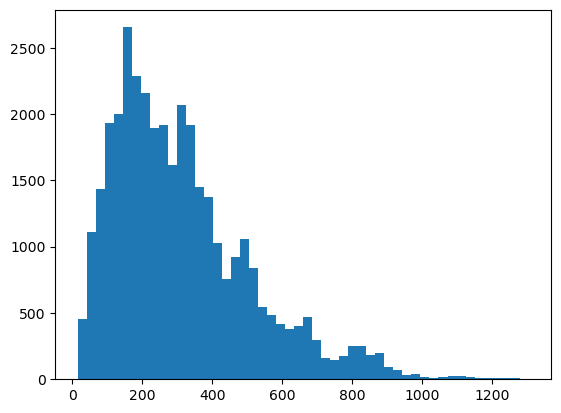

In [42]:
# Frequency Distribution of installments
plt.hist(df.installment, bins=50)
plt.show()

Monthly Payments of 200 is at a higher frequency, Left skew refers that majority of them below 400

In [43]:
df.grade.value_counts()

grade
B    10800
A     9276
C     7312
D     4721
E     2396
F      865
G      260
Name: count, dtype: int64

In [44]:
Grp_loan=df.groupby(["grade"])['loan_amnt'].mean()
#plt.plot(df.grade,df.loan_amnt.mean())

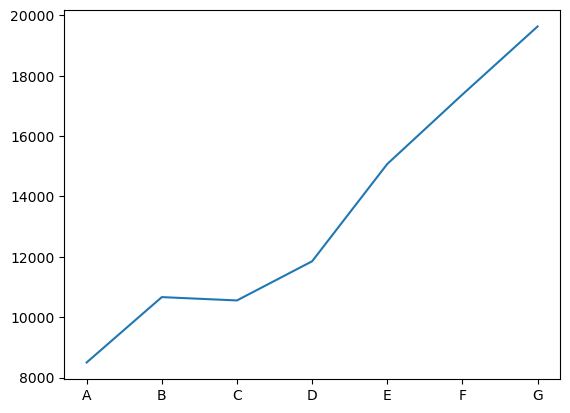

In [45]:
plt.plot(Grp_loan)

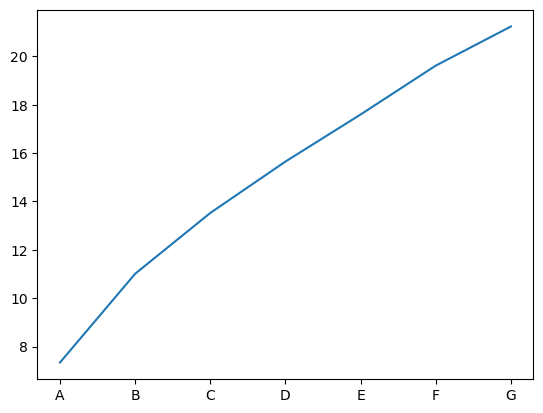

In [46]:
Grp_intrate=df.groupby(["grade"])['int_rate'].mean()
plt.plot(Grp_intrate)

From the above plots, we can infer that E,F and G grades have high interest rates and loan amounts.We can conclude that larger interest rates are applied for high loans

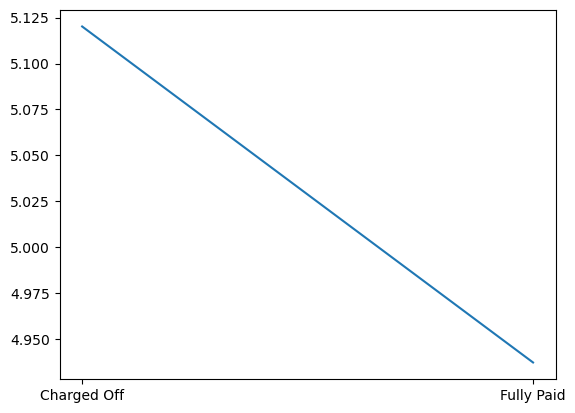

In [48]:
Grp_intrate=df.groupby(["loan_status"])['emp_length'].mean()
plt.plot(Grp_intrate)

Fully paid's average employee length is less that charged off's tenure

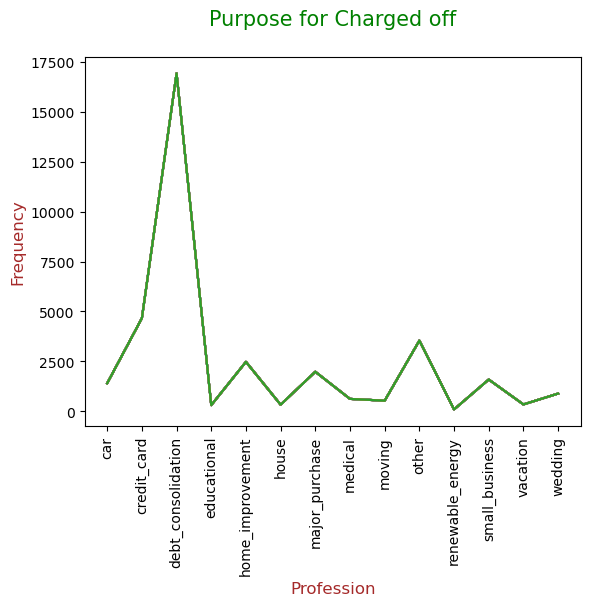

In [72]:
h=df.groupby(['purpose']).count()
plt.plot(h)
# Adding and formatting title
plt.title("Purpose for Charged off\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Profession", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Frequency", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )



plt.xticks(rotation=90)

plt.show()

From the above plot, among the various reasons, majority of charged off is debt_consolidation.

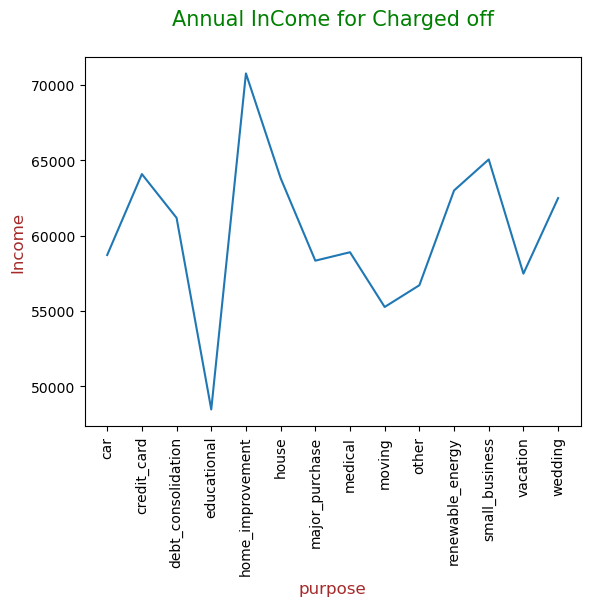

In [75]:
h=df.groupby(['purpose'])['annual_inc'].mean()
plt.plot(h)
# Adding and formatting title
plt.title("Annual InCome for Charged off\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )



plt.xticks(rotation=90)

plt.show()

From above it is observed that home_improvement loans has highest no of charged off

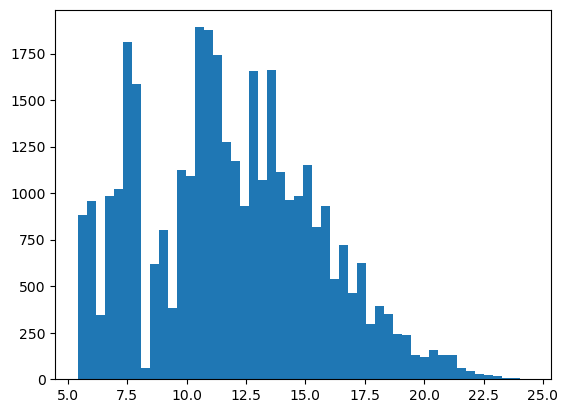

In [74]:
# # Frequency Distribution of interest rate
plt.hist(df.int_rate, bins=50)
plt.show()

In [50]:
df.purpose.value_counts()

purpose
debt_consolidation    16930
credit_card            4660
other                  3537
home_improvement       2472
major_purchase         1975
small_business         1585
car                    1398
wedding                 882
medical                 615
moving                  525
vacation                337
house                   325
educational             302
renewable_energy         87
Name: count, dtype: int64

****Segmented Univariate Analysis****

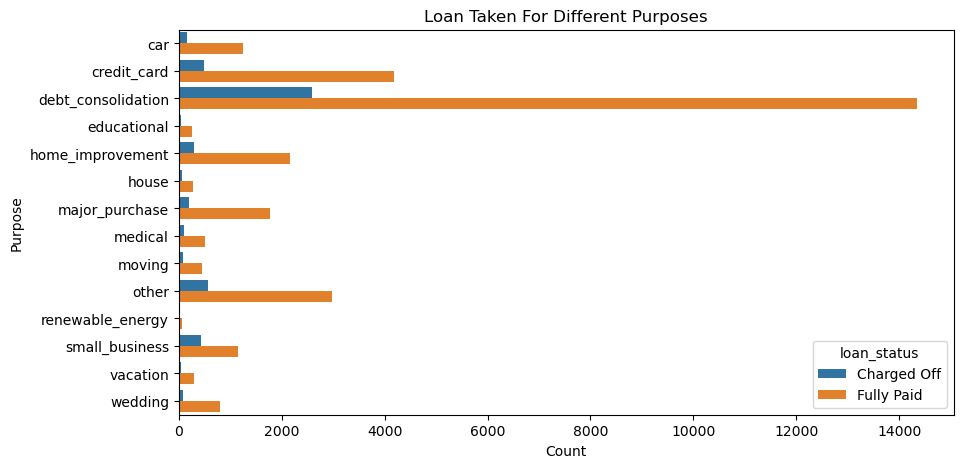

In [51]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

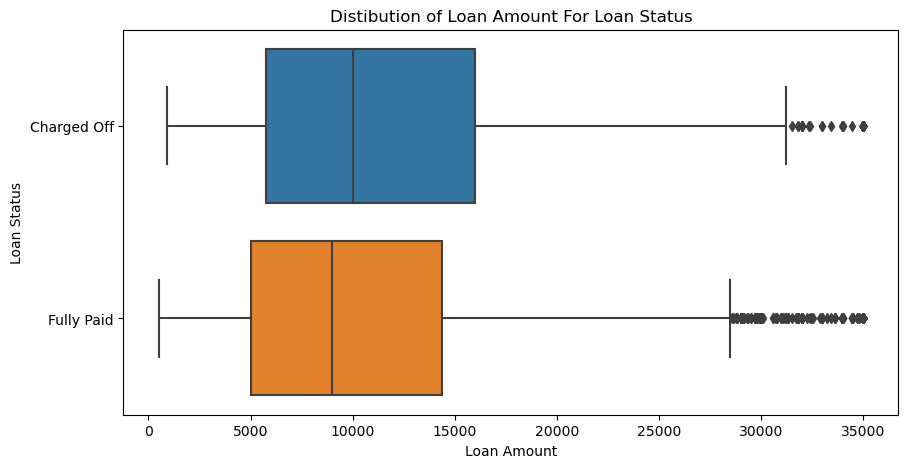

In [52]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

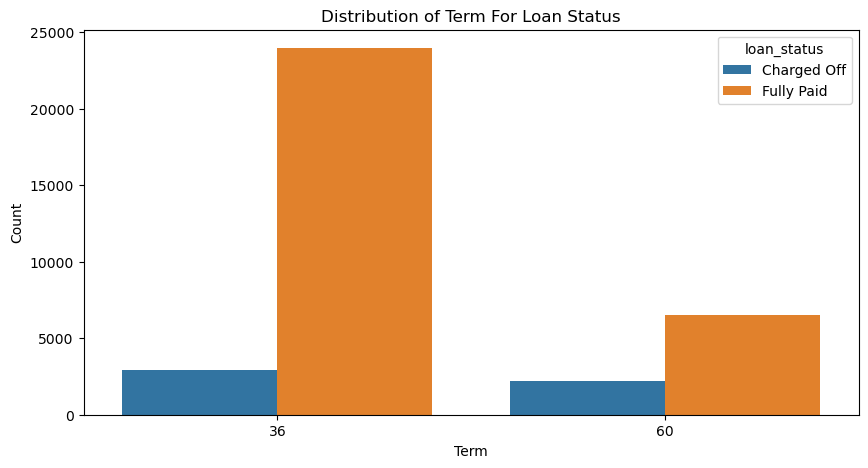

In [53]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

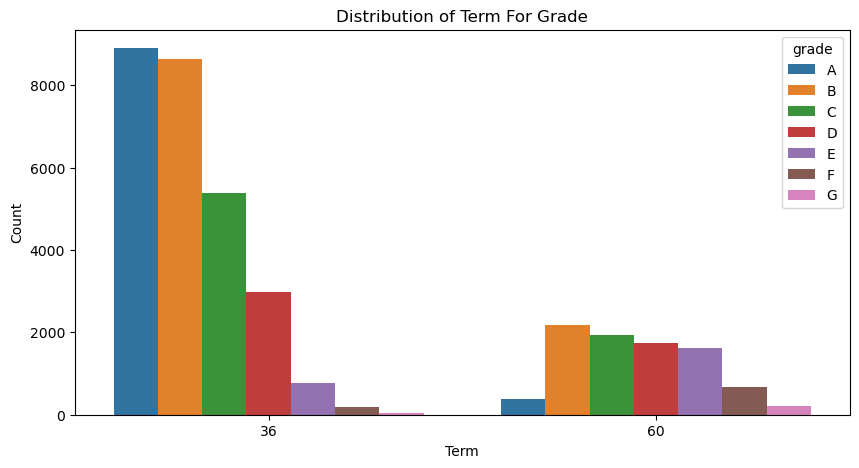

In [54]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

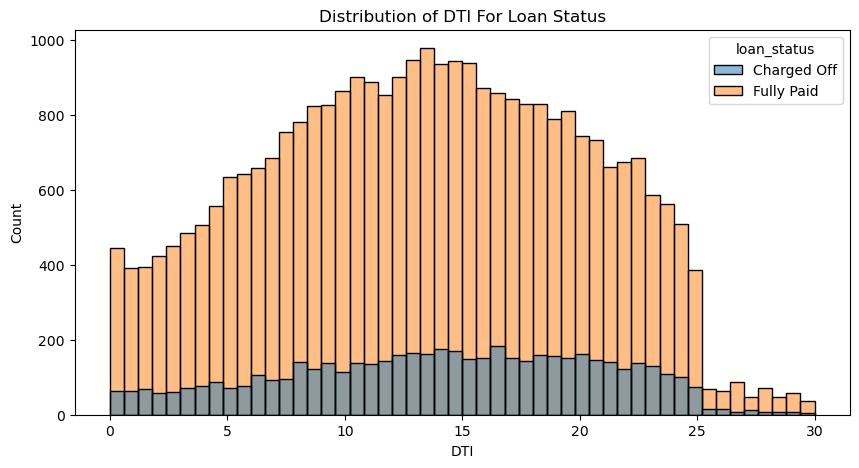

In [68]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='dti',hue='loan_status',bins=50)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

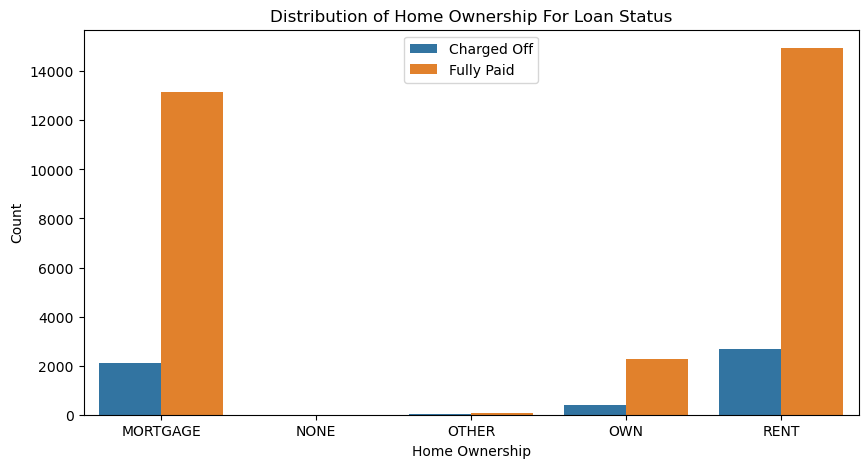

In [56]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

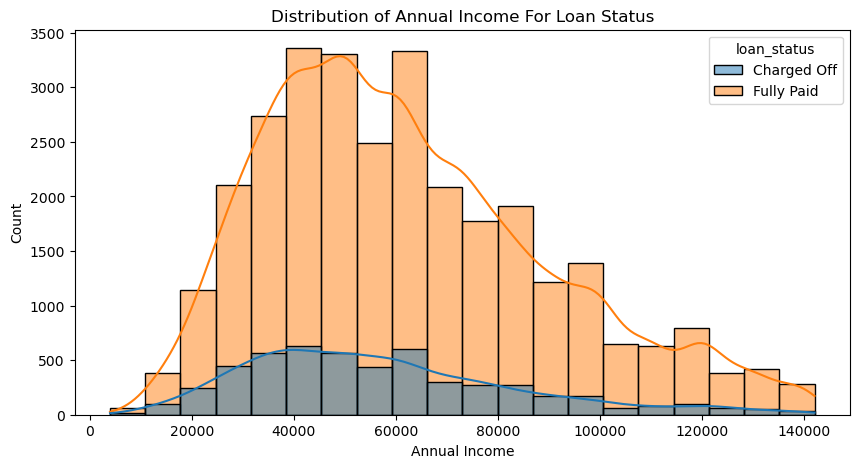

In [57]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

In [58]:
df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year
df['issue_month']=pd.to_datetime(df.issue_d,format='%b-%y').dt.month

In [59]:
df['issue_year'] = df['issue_year'].astype('str')
df['issue_month'] = df['issue_month'].astype('str')

In [60]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,1,3,0,83.7,9,0.0,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,1999-04-01,5,3,0,9.4,4,0.0,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,2,2,0,98.5,10,0.0,2011,12
3,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,1996-02-01,1,10,0,21.0,37,0.0,2011,12
5,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,2004-11-01,3,9,0,28.3,12,0.0,2011,12


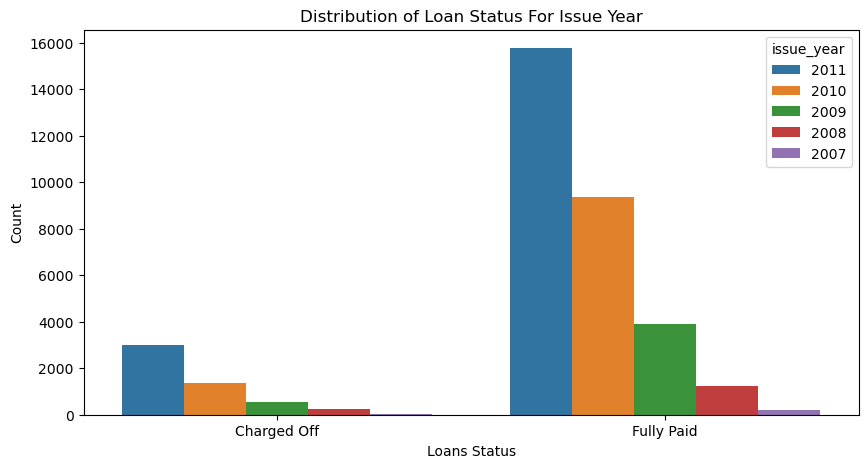

In [61]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

<Axes: xlabel='issue_year', ylabel='count'>

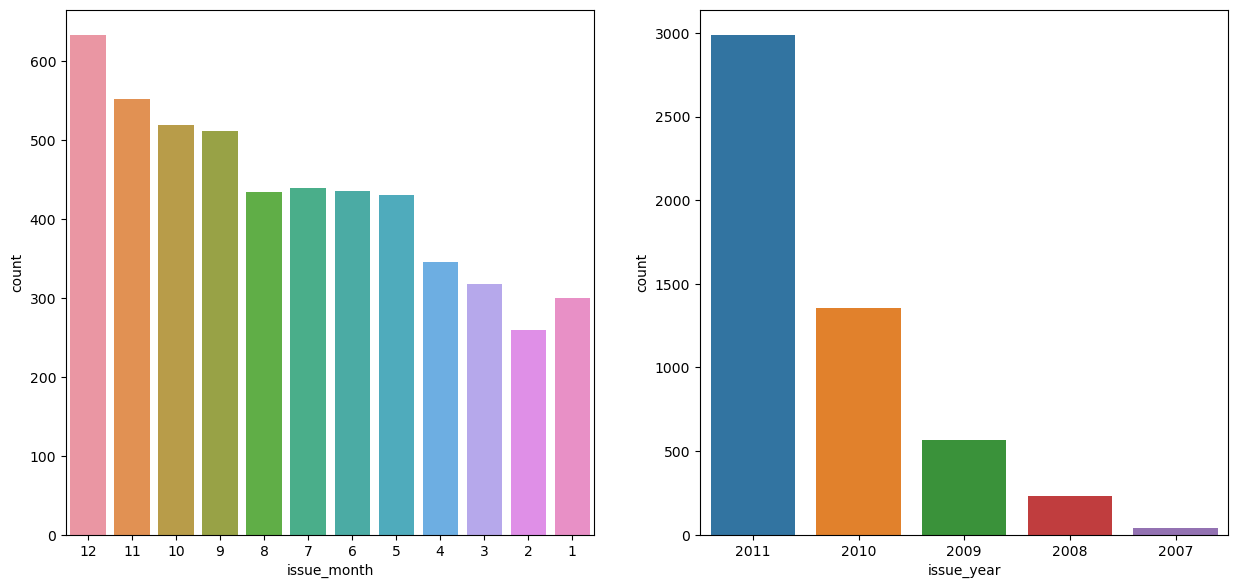

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=df[df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=df[df['loan_status']=='Charged Off'])

The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

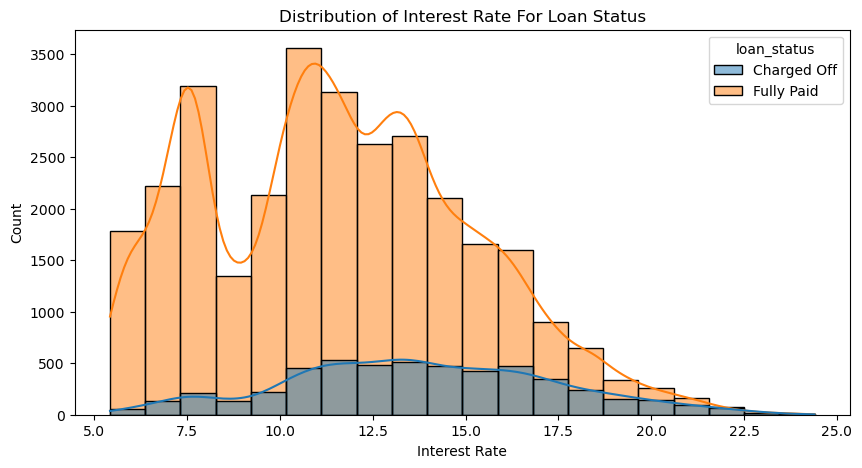

In [62]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

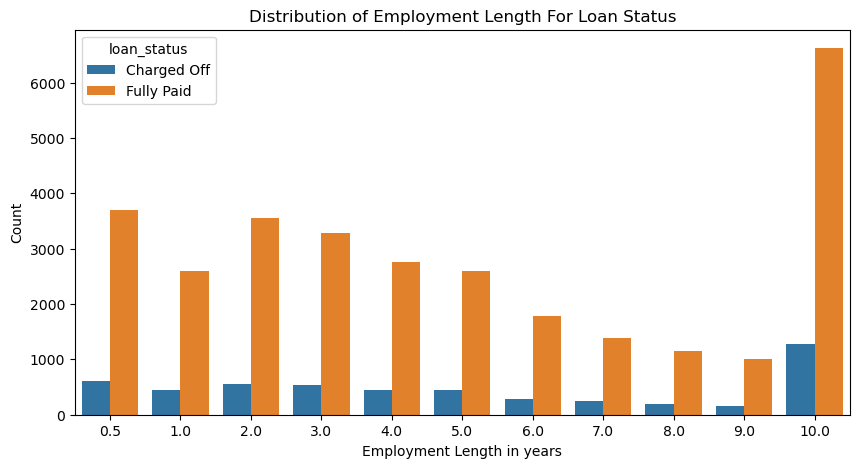

In [70]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

****Bivariate Analysis****

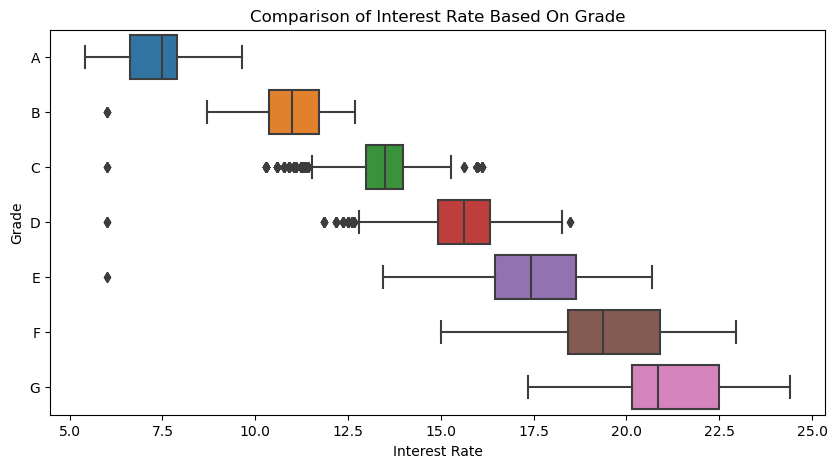

In [63]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

The Grade represent risk factor thus we can say interst rate increases with the risk.

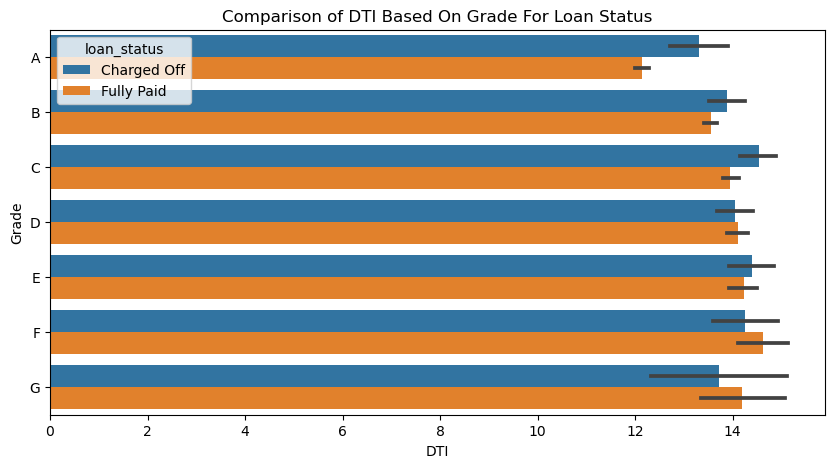

In [64]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

The Grade G which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

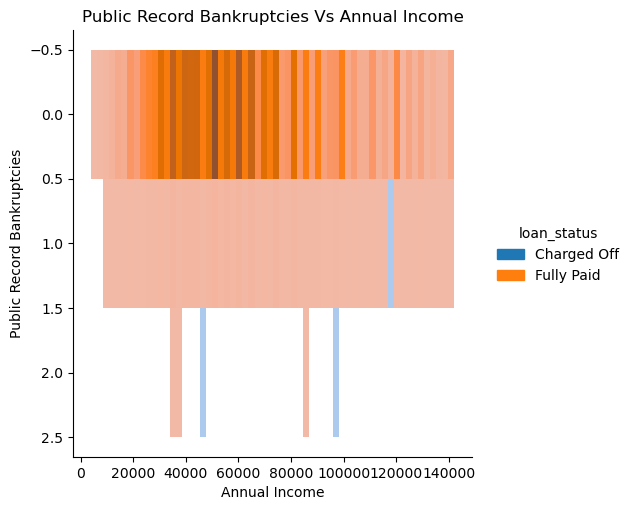

In [65]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=df.pub_rec_bankruptcies.astype('category'),x=df.annual_inc,hue=df.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.